# Segmentação das imagens EP3.1 

In [133]:
import os
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure, img_as_ubyte, io 
from skimage.filters import threshold_otsu, try_all_threshold
from skimage.measure import label, regionprops

In [102]:
TEST_IMAGE_PATH = Path('ground_truth') / 'brush' / 'gt_IMG_1431.JPG'

test_img = io.imread(TEST_IMAGE_PATH)

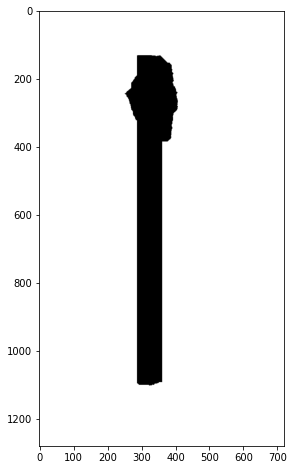

In [83]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.imshow(test_img, cmap='gray')

## Thresholding 

In [84]:
def threshold_segmentation(img):
    thresh = threshold_otsu(img)
    binary = img > thresh
    
    return binary

In [85]:
ORIGINAL_GRAY_DATASET_PATH = Path('original_gray_dataset/')
SEGMENTED_DATASET_PATH = Path('segmented_dataset')

for filename in ORIGINAL_GRAY_DATASET_PATH.rglob('*'):
    if filename.is_file():
        head, tail = os.path.split(filename)
        object_class = head.split('/')[-1]
        segmented_path = f'{SEGMENTED_DATASET_PATH}/{object_class}'

        os.makedirs(segmented_path, exist_ok=True)
        
        img = io.imread(filename)
        segmented_img = threshold_segmentation(img)
        uint8_segmented_img = img_as_ubyte(segmented_img)
        io.imsave(f'{segmented_path}/{tail}', uint8_segmented_img)

## Cortar imagem na Feret Box


- usar as imagens segmentadas na mão (achar a box máxima)
- se não achar box usar o fallback (máximo das imagens segmentadas na mão)

In [129]:
def compute_bounding_box(img, is_binary=True):
    if not is_binary:
        img = img < 255
    
    label_image = label(img)
    
    area = 0
    minr, minc, maxr, maxc = np.zeros(4)
    
    for region in regionprops(label_image):
        if region.area >= 100:
            new_minr, new_minc, new_maxr, new_maxc = region.bbox
            new_area = (new_maxr - new_minr) * (new_maxc - new_minc)
            if new_area > area:
                area = new_area
                minr, minc, maxr, maxc = new_minr, new_minc, new_maxr, new_maxc

    print(minr, maxr, minc, maxc)                
    box_img = img[minr:maxr, minc:maxc]

    return ~box_img

In [132]:
SEGMENTED_DATASET_PATH = Path('segmented_dataset')
SEGMENTED_FERET_BOX_DATASET_PATH = Path('segmented_feret_box/')
GROUND_TRUTH_FERET_BOX_DATASET_PATH = Path('ground_truth_feret_box/')

for filename in SEGMENTED_DATASET_PATH.rglob('*'):
    if filename.is_file():
        head, tail = os.path.split(filename)
        object_class = head.split('/')[-1]
        box_path = f'{SEGMENTED_FERET_BOX_DATASET_PATH}/{object_class}'

        os.makedirs(box_path, exist_ok=True)
        
        img = io.imread(filename)
        feret_box_img = compute_bounding_box(img, False)
        uint8_feret_box_img = img_as_ubyte(feret_box_img)
        io.imsave(f'{box_path}/{tail}', uint8_feret_box_img)

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1126.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1176.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1121.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

400 864 176 512
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1178.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1107.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1301.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 840 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1183.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1290.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1404.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 1280 0 720
0 1280 0 720
400 888 120 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1399.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1109.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1164.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1104 0 720
0 1280 0 720
360 832 288 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1299.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1293.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1162.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

320 792 112 520
0 1280 0 720
0 1280 0 720
104 1280 0 472
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1128.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1122.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1391.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1284.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1282.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1167.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1115.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1182.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 379 0 472
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1108.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1285.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1168.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

408 888 280 392
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1393.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1184.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1177.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
400 888 336 440
0 1280 0 720
416 824 248 536
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1300.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1295.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1123.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

424 848 208 528
312 832 248 368
456 728 248 504
488 760 216 472
0 1280 0 720
0 784 0 696
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1411.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1120.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1169.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 688
0 1280 0 720
376 872 296 416
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1163.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1286.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1181.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 840 0 634
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1400.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1400.JPG is a low contrast image
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1112.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1305.JPG is a boolean image: setting True to 255 and False to 0. To 

416 912 296 408
0 920 0 476
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1160.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1296.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1125.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
360 912 160 576
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1292.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1303.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1165.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

464 704 296 520
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1170.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1166.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1308.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1394.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1289.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1405.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

352 864 352 472
0 1280 0 720
344 848 320 432
0 1280 0 720
472 768 176 416
440 872 168 480
432 872 176 512


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1119.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1186.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1161.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
384 800 104 432
0 1280 0 720
344 824 96 496


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1306.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1173.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1129.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 1280 0 720
0 1280 0 720
87 1280 0 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1414.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1131.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1416.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
424 904 320 424
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1302.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1283.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1294.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1396.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1174.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1114.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 488
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1117.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1417.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1401.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 1280 0 720
376 856 248 600
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1415.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1409.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_E1304.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/earring/IMG_1132.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1273.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1088.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
224 1080 296 512
184 1096 224 456
216 1048 280 528
120 1016 240 424
0 992 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1081.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1379.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1134.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
104 1168 120 544
0 1280 0 720
144 1088 176 512
128 1016 0 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1149.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1265.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1373.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 1280 0 720
272 1144 214 496
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1374.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1095.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1278.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
160 1016 248 464
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1155.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1268.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1272.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1032 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1080.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1087.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1389.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
240 1056 240 528
0 1280 0 720
304 1024 217 424
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1255.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1276.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1094.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1263.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1367.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1385.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

152 1064 216 448
0 1280 0 720
0 1280 0 720
0 1064 0 720
0 1056 0 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1135.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1150.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1145.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarnin

0 1280 0 720
0 1280 0 720
0 1064 0 512
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1371.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1381.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1092.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1098.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1159.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1148.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
0 1280 0 720
0 1280 0 720
232 984 256 488
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1275.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1158.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1368.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1386.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1375.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1079.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
192 1096 204 496
0 1280 0 720
0 1280 0 584


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1090.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1100.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1097.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
216 1088 256 472
200 1056 272 480
0 1280 0 720
96 992 0 464


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1105.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1369.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1133.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
160 1016 232 424
0 1280 0 544
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1146.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1086.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1267.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

240 1000 248 424
0 1280 0 720
48 1088 8 432
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1151.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1137.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1093.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
240 1096 192 528
0 1280 0 720
216 1128 80 384
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1089.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1101.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1387.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

184 1064 232 480
0 1280 0 720
0 1280 0 720
160 1040 0 496
184 1088 240 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1366.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1376.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1257.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

56 1160 96 552
0 1280 0 720
0 1280 0 720
0 1280 72 720
176 1048 264 480


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1266.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1271.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1380.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 1280 0 720
288 1080 264 552
232 1040 176 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1096.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1377.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_E1147.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning

0 1280 0 720
232 1056 256 520
0 1280 0 720
0 1280 0 720
544 944 328 528
144 1016 208 416
208 1040 304 568


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1274.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1365.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1378.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
0 1016 0 720
208 1072 224 480
208 1040 200 408
120 1024 272 488
209 1072 232 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1099.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1141.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/glasses/IMG_1280.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

0 1280 0 720
0 1280 0 720
304 968 264 496
0 1280 0 720
336 928 80 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0872.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0930.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0913.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

0 1280 0 720
0 1280 0 720
336 1032 192 472
328 1008 184 416
232 984 192 504
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0938.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1066.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0917.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
0 904 110 615
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0861.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0851.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0985.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720
352 992 192 392


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0990.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0931.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1078.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0846.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0863.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1002.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0932.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0873.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1057.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


216 920 264 504
344 896 104 432
352 864 24 416
344 1016 192 488
392 1056 224 472
264 1016 160 464
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1005.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1054.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0859.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

0 1280 0 720
0 1280 0 720
352 872 0 416
432 896 216 400


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0871.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0914.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0857.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0982.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0862.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0933.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
296 880 0 488
352 1016 200 488
251 1024 232 504
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0870.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0876.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0919.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0934.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0943.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0921.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0991.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1060.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0856.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1009.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0996.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1067.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0972.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1001.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0908.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1076.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0977.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
360 824 158 496
448 856 192 400
360 896 184 480
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0869.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0849.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0995.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

416 984 184 416
0 1280 0 720
360 1000 144 424
232 904 0 488


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0937.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1008.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0935.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
325 912 200 376
680 912 224 360


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0874.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0987.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0983.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

0 1280 0 720
315 880 88 440
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0880.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1070.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1046.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0845.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0847.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


176 864 8 464
560 880 288 456
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0866.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0994.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0879.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
344 1016 136 432
0 1280 0 720
328 992 40 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1059.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0936.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0941.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

464 960 168 536
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0877.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0853.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1007.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0929.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
160 832 0 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0878.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0854.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0850.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
296 968 248 472
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0986.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0998.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0911.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
520 864 296 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1074.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1055.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0993.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 488
328 904 104 432
312 864 48 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0865.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0984.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1072.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16:

0 1280 0 720
656 896 240 384
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0971.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0976.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0864.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


360 928 0 464
0 1280 0 720
304 864 0 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0875.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0855.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0848.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
472 896 240 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0920.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0923.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1003.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1047.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0915.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1056.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


256 864 0 488
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0858.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0999.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1049.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
376 968 152 392
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1069.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1045.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0989.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
304 968 264 496
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1058.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0912.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0978.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1075.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1051.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0916.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0922.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0925.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1073.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0939.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0973.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0988.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0980.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1077.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_E0860.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


408 968 144 416
296 880 56 456
0 1280 0 720
280 904 232 400


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1043.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1053.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_1048.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: 

0 1280 0 720
0 1280 0 720
440 912 128 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0981.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/nail_polish/IMG_0979.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1684.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: Use

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1592.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1574.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1799.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
336 824 240 344
0 832 280 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1584.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1788.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1469.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
288 1280 0 320
368 824 304 408


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1800.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1454.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1587.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
336 848 312 432
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1473.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1682.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1459.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
216 824 312 480
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1810.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1468.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1681.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 640


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1465.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1688.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1570.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 656


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1808.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1699.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1582.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
352 904 280 392
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1789.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1464.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1797.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1790.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1802.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1792.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
328 784 104 344
280 792 256 360
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1463.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1695.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1806.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1457.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1572.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1455.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
283 1280 0 328
375 840 208 512
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1466.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1586.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1694.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 648
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1691.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1569.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1690.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
360 832 152 456
288 808 296 392
192 848 320 552
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1474.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1693.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1804.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 600


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1573.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1565.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1568.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
352 832 288 432


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1679.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1793.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1479.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
352 808 136 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1698.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1692.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1685.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1807.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1581.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1803.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1453.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1678.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1567.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1590.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1683.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1472.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1467.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1809.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1478.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 640
352 832 336 432
321 848 304 408
0 1280 0 720
40 1280 0 368


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1591.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1787.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1795.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
360 816 152 472
304 784 376 464
0 1280 0 530
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1798.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1703.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1805.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1801.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1575.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1583.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
408 856 112 360
0 1280 0 568
344 832 216 368
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1580.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1704.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1579.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
344 800 304 400
0 1280 0 720
352 832 104 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1475.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1700.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1786.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

360 880 328 432
0 1280 0 504
0 1280 0 720
368 880 312 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1796.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1578.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1680.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
352 816 64 344
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1812.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1686.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1585.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1576.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1696.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
152 1280 184 656
448 904 200 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/lipstick/IMG_1794.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0895.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0956.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:

0 1280 0 720
0 1280 0 720
264 1168 160 536


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0898.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1016.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0903.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1033.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0883.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0944.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0834.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
416 856 104 440
0 1152 0 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0818.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0843.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1011.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1144 0 560
0 1280 0 664
0 1280 0 720
384 864 168 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0831.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0967.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0945.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
232 904 24 544
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0952.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0841.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0819.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1034.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0833.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0828.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 984 72 512


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0968.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1029.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0949.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

88 864 144 472
0 1280 0 720
0 1184 0 512
320 1280 160 528


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0902.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0891.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0962.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
152 1280 128 496


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0894.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0881.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0889.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
376 840 264 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0884.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1032.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0844.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0835.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1021.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0904.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

328 856 112 448
400 1232 192 520
0 1280 0 496
296 816 136 560
198 784 0 504
312 856 51 520


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0823.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0821.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0826.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0961.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0963.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1028.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0836.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0901.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1019.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1037.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0893.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
0 1280 0 720
208 456 248 576
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0948.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0820.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0946.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
432 896 184 392
936 1192 168 480
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0957.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1010.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0900.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launch

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1025.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0892.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
976 1224 192 520
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0907.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0947.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0897.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
272 911 64 472


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0955.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0959.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0840.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0829.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0827.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
1000 1104 240 539


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1036.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0837.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1012.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0890.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1015.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0951.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0953.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1035.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
344 944 248 480


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0842.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0838.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0886.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 488
248 912 24 520
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0964.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0966.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0839.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
0 1280 0 720
16 768 184 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1014.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0896.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1031.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


16 896 64 440
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1030.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0887.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1018.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0970.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1023.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1024.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1026.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0825.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0824.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
360 848 187 432
0 1280 0 720
368 944 256 504


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0882.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_1022.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0905.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launche

0 1280 0 720
0 1280 0 720
421 880 184 400


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0950.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_0899.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/hand_sanitizer/IMG_E0958.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720
136 1048 72 560


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1613.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1719.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1611.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 576


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1600.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1838.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1718.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

144 1088 136 576
0 1280 0 720
0 1280 0 720
0 1280 0 504


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1832.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1822.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1821.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1496.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1727.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1710.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1829.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1835.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1594.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
112 1064 0 616
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1837.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1720.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1707.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
112 1088 48 616
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1706.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1815.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1593.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1497.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1492.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1608.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

192 1104 56 592
128 1088 56 632
0 1280 0 720
176 1011 176 576
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1731.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1814.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1819.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
130 1280 120 720
0 1280 0 720
72 1136 64 680


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1595.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1507.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1494.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 552
160 1128 0 624
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1605.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1713.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1817.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
128 1048 0 584
240 1080 168 584
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1839.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1722.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_E1489.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarn

0 1280 0 720
0 1280 0 648
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1617.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1616.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1826.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


120 1280 88 704
0 1280 0 720
0 1280 0 624
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1509.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1714.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1614.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720
440 1080 144 608


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1503.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1708.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1482.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
129 1096 144 584
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1506.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1833.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1840.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1723.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1709.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1609.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1612.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1827.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 512
152 1072 40 584
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1724.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1606.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1729.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 576
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1597.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1501.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1728.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1828.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1715.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_E1485.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720
48 1121 40 680


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1820.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1483.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1502.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

144 1064 112 560
0 1280 0 720
0 1280 104 720
160 1056 0 552


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1491.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1504.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1508.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

120 1136 0 680
32 1120 0 672
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1711.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1712.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1505.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 632
120 1088 72 656
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1615.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1816.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1599.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
736 1056 112 584
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1836.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1618.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1823.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarni

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_E1486.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1831.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1705.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
152 1104 112 552
136 1136 40 648
0 1280 0 560


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_E1487.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1834.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1498.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarn

0 1280 0 720
272 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1603.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1824.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1604.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1726.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/notebook/IMG_1602.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1353.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 992 0 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1219.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1189.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1314.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
40 1248 360 448
0 1280 0 720
64 1248 320 408


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1204.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1331.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1341.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1220.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1198.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1344.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1335.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1318.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1311.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1194.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1359.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1212.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1315.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


48 1280 136 368
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1201.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1238.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1195.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
112 1168 176 392
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1352.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1190.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1326.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1317.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1328.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1203.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


56 1264 272 440
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1225.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1309.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1333.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1241.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1343.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1222.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1345.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1339.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
56 1240 216 360
152 1192 232 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1207.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1202.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1338.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
56 1280 136 384
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1336.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1200.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1342.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

112 1224 336 464
264 1224 360 432
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1322.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1234.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1240.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
128 1264 288 432
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1355.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1223.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1221.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1324.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1350.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1232.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1206.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1205.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1231.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1327.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
32 1256 312 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1357.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1332.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1218.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1346.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1228.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1351.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


136 1240 336 408
0 1280 0 720
144 688 296 376
0 1280 0

/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1233.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1197.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1216.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

 720
0 1280 0 720
96 1184 208 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1230.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1191.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1356.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
344 704 296 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1193.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1196.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1347.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1227.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1209.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1360.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


152 1184 224 416
0 1280 0 720
0 1280 0 720
64 1232 248 392


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1316.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1337.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1237.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
88 1040 296 440
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1313.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1229.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1188.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1348.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


64 1256 152 376
72 1248 304 464
0 1216 24 720
96 1232 320 448


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1199.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1224.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1323.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1319.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1211.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1340.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
136 1192 192 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1236.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1208.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1363.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1320.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
144 792 272 408
184 704 352 432


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1310.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1312.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1215.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1349.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1217.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


56 1208 312 400
64 1184 160 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1235.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1192.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1329.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1325.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/knife/IMG_1354.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0620.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


240 1152 272 360
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0772.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0732.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


192 1168 296 384
0 1280 0 720
256 1208 328 432


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0662.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0673.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0799.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1216 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0420.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0366.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0676.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0700.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
144 984 232 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0704.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0590.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
184 1136 296 392


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0619.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0744.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0425.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0647.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
192 1200 344 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0419.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0698.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0610.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0609.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0601.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0672.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0714.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0762.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


248 1168 272 360
192 1160 320 424
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0424.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0392.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 144
0 1280 0 720
200 1168 312 480


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0719.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0599.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
184 1176 232 384
168 1008 296 408


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0769.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0598.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0394.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
152 1048 224 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0768.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0400.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0622.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0817.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


216 1160 128 360
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0643.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0776.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0395.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0641.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0429.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0739.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
248 1136 336 456
0 1184 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0720.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0788.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0369.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0613.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0711.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0628.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0759.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


200 1144 312 392
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0753.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0594.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


280 1096 312 424
0 1088 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0779.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0367.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0675.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


192 1208 112 424
256 1192 304 360
192 1104 184 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0644.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0669.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0615.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1208 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0375.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0765.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
216 1152 368 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0630.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0386.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0407.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0410.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0605.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0646.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0783.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0777.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
376 1216 376 440
152 1264 304 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0792.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0707.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0671.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
200 1144 256 416


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0640.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0597.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 488


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0421.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0384.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
96 1064 200 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0791.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0387.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0726.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0668.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0806.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0418.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0655.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0747.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0718.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
152 1168 144 360


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0667.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0633.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
192 992 440 576


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0796.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0403.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0710.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0686.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


224 1160 352 440
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0797.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0629.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 616
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0591.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0427.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


160 1120 368 456
272 1072 264 352
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0754.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0735.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0737.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0793.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
160 944 280 496


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0749.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0397.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
288 1104 248 432
280 1136 344 416
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0786.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0624.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0770.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented

0 1280 0 720
104 1240 304 392
240 1144 255 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0595.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0688.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0617.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0431.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0639.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


136 1240 296 384
264 1056 232 400
0 1280 0 720
144 1080 264 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0687.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0625.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0782.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0733.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0417.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


168 1128 208 368
0 1280 0 720
208 1224 256 328
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0814.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0709.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0670.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0757.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0359.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0600.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


144 1104 336 416
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0807.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0810.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0681.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


168 1096 328 472
0 1280 0 720
272 1184 376 472
168 1224 232 336


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0608.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0370.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0798.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1080 0 680
0 1280 0 720
168 1000 192 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0593.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0815.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0588.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0785.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0674.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
192 1144 168 352
168 1200 312 392


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0699.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0634.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0696.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
360 1200 248 384
0 1280 184 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0751.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0790.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0781.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0683.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0428.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
120 1166 288 368
0 1008 0 720
208 1088 256 464


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0398.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0689.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0773.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
0 1280 424 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0677.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0389.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0766.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0648.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0703.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


208 1016 272 416
88 1264 304 384
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0382.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0680.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0614.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
200 1080 232 384
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0695.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0606.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0657.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
176 1184 296 384
232 1112 344 424
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0618.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0661.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0743.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
0 1280 0 720
680 1104 320 400


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0721.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0682.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0789.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
384 1232 312 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0596.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0705.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0666.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0702.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0816.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0764.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


104 1240 312 392
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0725.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0808.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0637.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1144 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0358.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0604.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
40 1080 160 408
0 1280 0 608


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0423.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0775.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0402.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
168 1008 208 376
0 1080 0 720
208 1168 280 368


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0658.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0589.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0360.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

0 1280 0 720
296 1104 334 400
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0645.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0736.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0742.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
168 1072 208 400
0 1280 0 512


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0602.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0653.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0780.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0740.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0809.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0636.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0654.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0623.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0746.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1232 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0731.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0364.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0804.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0727.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
152 1064 328 472


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0748.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0585.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0404.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0649.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0587.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


160 1120 216 368
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0607.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0376.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0659.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0621.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0408.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0656.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0784.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0411.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
184 823 360 432
0 1280 0 720
224 1104 256

/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0778.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0761.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0426.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


 376
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0393.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0795.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0631.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0691.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0416.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0690.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0767.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
152 1248 304 384


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0684.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0396.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0724.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
160 1016 160 336


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0794.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0708.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
176 1136 192 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0652.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0611.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0635.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0368.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0627.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0685.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0758.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


320 1216 320 392
0 1240 0 256
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0706.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0752.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0787.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
256 1136 152 320
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0663.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0616.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0712.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
168 1120 376 472
0 1240 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0741.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0745.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0774.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


104 1000 296 472
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0399.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0414.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1240 0 600


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0801.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0756.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0390.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0415.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0692.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1144 0 720
208 824 328 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0356.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0763.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0738.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0722.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0406.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
224 1176 256 384
184 1208 336 424
176 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0717.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0388.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0697.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
296 1080 344 408
288 1160 352 416
0 1272 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0701.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0734.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0771.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_

120 1232 296 376
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0723.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0650.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 56 720
128 1120 312 416
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0592.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0716.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0412.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0664.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0603.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


80 1264 328 400
208 1208 112 392
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0679.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0642.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0612.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0694.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0430.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
184 992 176 352
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0632.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0651.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0693.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0422.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0638.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0665.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0805.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0750.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0713.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
232 1096 232 424
0 1096 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0760.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0383.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_0365.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 936 120 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/pen/IMG_E0802.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1744.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1536.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1621.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1743.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
320 856 0 552
336 864 0 464
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1755.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1738.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1739.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1522.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1848.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1866.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1623.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1640.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 944 120 720
0 1280 0 440
312 1008 176 592


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1520.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1535.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1644.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
0 1280 0 720
352 848 240 576


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1732.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1858.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1525.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 528
0 1280 0 560


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1742.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1633.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1624.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 35 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1632.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1631.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1517.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
384 888 0 552


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1523.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1530.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1740.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1648.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1863.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


344 1280 103 720
0 1280 0 720
0 1280 46 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1860.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1529.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1518.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 896 0 552
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1733.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1749.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1856.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


232 872 0 464
0 1280 0 720
416 784 392 600


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1747.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1750.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1526.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 688


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1844.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1514.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1511.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1847.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1628.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1521.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1741.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
269 896 0 464
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1532.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1756.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1636.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 936 96 480


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1735.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1746.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1643.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 536
0 921 224 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1857.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1625.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1534.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1510.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1734.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
344 970 152 488


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1867.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1533.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1843.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1736.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1855.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 496
0 1280 0 720
336 848 0 560
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1635.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1519.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1757.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

360 984 152 536
360 1008 192 576
344 960 174 568
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1841.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1851.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1842.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
400 928 176 554
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1638.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1527.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1846.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
48 1280 24 648
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1512.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1516.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1647.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 864 0 608
352 1280 120 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1853.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1758.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1861.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 904 64 456


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1854.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1629.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1642.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1524.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1531.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1745.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1515.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1864.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1639.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1862.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 472


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1753.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1845.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1634.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 576
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1528.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1626.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1630.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1737.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1754.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1752.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


312 1280 96 720
352 848 0 528
400 1022 240 568
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1859.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1748.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1852.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_f

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1513.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1622.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1849.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1865.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/mug/IMG_1751.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1670.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1556.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 552
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1551.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1537.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
256 944 296 360


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1785.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1663.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1768.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1160 0 536
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1426.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1439.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1435.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
264 1112 304 400
248 1000 264 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1449.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1674.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1434.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
240 984 224 376


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1652.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1665.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1675.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
264 1096 96 360
0 1280 0 480
240 1072 240 664


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1543.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1659.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1542.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 424
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1561.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1429.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720
232 1080 124 432


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1546.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1673.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1658.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
240 1096 200 408
264 960 336 408
272 952 296 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1763.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1452.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1769.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1762.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1562.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
336 1096 344 424
0 1280 0 536
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1672.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1433.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1541.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segme

0 1280 0 720
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1427.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1563.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1447.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


208 1016 248 368
0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1761.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1671.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1554.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


264 1024 240 416
0 1280 0 720
304 1056 200 384


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1777.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1654.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1779.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1444.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1553.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1783.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1773.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
256 1048 264 440


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1771.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1451.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1765.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1442.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1547.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1781.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1552.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1669.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


232 1008 288 408
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1760.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1664.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1782.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1428.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1431.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1446.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1539.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1764.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1441.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1437.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1772.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
168 1048 116 424


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1767.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1657.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1653.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1545.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


152 1144 296 536
256 1040 264 376
0 1280 0 488


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1438.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1759.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1549.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 440
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1559.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1784.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


216 1048 248 440
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1450.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1558.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


208 1056 152 456
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1666.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1766.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


216 1032 224 456
224 1064 116 400
0 1080 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1775.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1668.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1544.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1662.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1655.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 536


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1448.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1540.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
160 1136 248 400


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1651.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1443.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 448
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1560.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1436.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1780.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1660.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1048 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1776.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1548.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


272 1112 344 432
0 1200 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1432.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1656.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


144 1080 224 480
0 1280 0 464


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1440.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1550.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1564.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1430.JPG is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1677.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


296 960 224 360
0 1280 0 720


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1661.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1538.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
200 1040 160 488
288 968 288 352


/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1667.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1770.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()
/home/iblucher/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: segmented_feret_box/brush/IMG_1557.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  app.launch_new_instance()


0 1280 0 720
